In [1]:
from torch import nn

In [4]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.h = nn.Linear(784,256)
        self.out = nn.Linear(256,10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
        
    def forward(self,x):
        x = self.h(x)
        x = self.sigmoid(x)
        x = self.out(x)
        x = self.softmax(x)
        
        return x

In [5]:
model = Network()

In [6]:
model

Network(
  (h): Linear(in_features=784, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [7]:
import torch.nn.functional as F

In [13]:
class Network_1(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        
        
    def forward(self,x):
        
        x = self.hidden(x)
        x = F.sigmoid(x)
        x = self.output(x)
        x = F.softmax(x, dim=1)
        
        return x
        

In [14]:
model = Network_1()

In [15]:
model

Network_1(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [16]:
class Network_2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x)
        
        return x

In [17]:
model = Network_2()

In [18]:
model

Network_2(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [21]:
print(model.fc3.weight)
print(model.fc3.bias)

Parameter containing:
tensor([[-0.0862,  0.0753, -0.0253,  0.0623, -0.0679, -0.0212, -0.0028,  0.0298,
         -0.0633, -0.0165,  0.0686,  0.0348,  0.0609,  0.0826,  0.0074,  0.0783,
          0.0384, -0.1036,  0.0361,  0.0687,  0.0799, -0.0270, -0.0594, -0.0134,
          0.1150, -0.0108, -0.0285, -0.1075,  0.0242, -0.0475, -0.0964,  0.0712,
         -0.0360, -0.0914,  0.0446, -0.0745, -0.1204, -0.1122,  0.0803,  0.0577,
         -0.0595, -0.1080,  0.0489, -0.0544, -0.1096,  0.0660, -0.0614,  0.0083,
          0.1125,  0.1087,  0.0977, -0.0212, -0.0269, -0.0660, -0.1078, -0.1227,
         -0.0944,  0.1202,  0.1111,  0.1118,  0.0873,  0.0757,  0.0025,  0.1117],
        [ 0.0926, -0.1170, -0.0143, -0.0481,  0.0818, -0.0476,  0.0528, -0.0578,
         -0.1089, -0.0619,  0.0126, -0.0823, -0.1173,  0.0088, -0.1054,  0.1053,
          0.1156, -0.0897,  0.0212, -0.0570,  0.0105, -0.1228, -0.0781,  0.0581,
          0.0816, -0.0352, -0.1005,  0.0992, -0.0080, -0.0742, -0.0115, -0.1108,
     

In [22]:
model.fc1.bias.data.fill_(0)
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0049,  0.0045, -0.0044,  ...,  0.0060,  0.0020,  0.0199],
        [ 0.0121,  0.0102,  0.0032,  ..., -0.0013,  0.0067,  0.0051],
        [ 0.0122, -0.0030, -0.0039,  ...,  0.0104, -0.0015, -0.0007],
        ...,
        [ 0.0034,  0.0027, -0.0108,  ..., -0.0058,  0.0033, -0.0018],
        [ 0.0099,  0.0018, -0.0057,  ..., -0.0043,  0.0128, -0.0052],
        [-0.0093, -0.0167,  0.0017,  ...,  0.0002, -0.0091,  0.0141]])

In [1]:
import helper

In [7]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [8]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [9]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/ubuntu/.pytorch/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


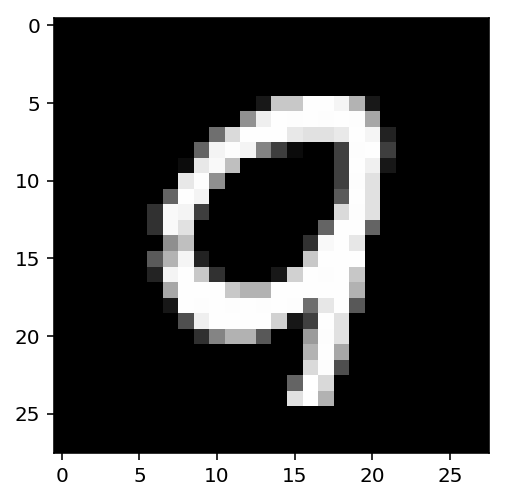

In [11]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [16]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x)
        
        return x

In [13]:
import torch
from torch import nn

In [14]:
import torch.nn.functional as F

In [17]:
model = Network()

print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0231,  0.0173, -0.0177,  ..., -0.0081,  0.0155, -0.0255],
        [-0.0322, -0.0241, -0.0212,  ...,  0.0076, -0.0113,  0.0289],
        [ 0.0300, -0.0227,  0.0325,  ..., -0.0168, -0.0349,  0.0234],
        ...,
        [-0.0198, -0.0041, -0.0135,  ...,  0.0354,  0.0277, -0.0181],
        [-0.0294, -0.0231,  0.0166,  ..., -0.0033,  0.0241,  0.0338],
        [-0.0355,  0.0234, -0.0074,  ..., -0.0070,  0.0354,  0.0099]],
       requires_grad=True)
Parameter containing:
tensor([-0.0166,  0.0157,  0.0353,  0.0097, -0.0019,  0.0150, -0.0331,  0.0096,
        -0.0085, -0.0310,  0.0265, -0.0022,  0.0271,  0.0073,  0.0041, -0.0186,
         0.0189, -0.0169,  0.0092, -0.0273, -0.0011, -0.0210,  0.0087, -0.0153,
         0.0252,  0.0115, -0.0024, -0.0303,  0.0019, -0.0150,  0.0226,  0.0309,
         0.0102,  0.0194,  0.0063, -0.0126, -0.0348, -0.0030, -0.0340, -0.0102,
         0.0287,  0.0290,  0.0017, -0.0159,  0.0037, -0.0313, -0.0346,  0.0041,
        -0.0335

In [18]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-1.4376e-03, -1.9500e-03,  2.3606e-03,  ..., -1.3013e-02,
         -7.9300e-03,  1.1125e-03],
        [ 1.6956e-02, -3.3686e-06, -3.0922e-03,  ..., -1.0658e-02,
          1.0207e-02, -8.9177e-03],
        [ 5.0130e-03, -1.1259e-03, -5.4310e-03,  ...,  4.3285e-04,
         -1.1316e-02,  4.8852e-03],
        ...,
        [ 4.7104e-03,  4.1035e-03, -4.1562e-03,  ..., -4.2820e-04,
         -8.8476e-03,  5.9873e-03],
        [-5.3389e-03,  1.3694e-03, -1.2138e-03,  ..., -6.5695e-04,
          2.3617e-02, -5.2989e-03],
        [ 1.6144e-02, -1.0574e-02,  5.0491e-03,  ...,  2.2782e-03,
         -8.3439e-03,  1.5429e-02]])

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


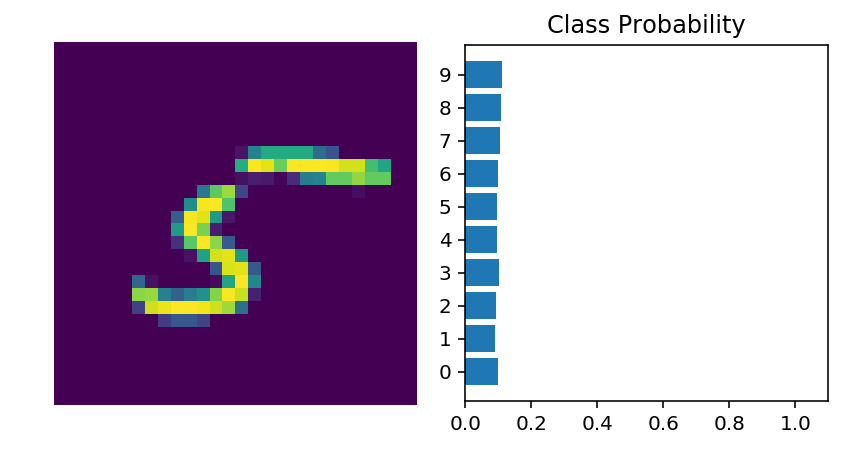

In [20]:

# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


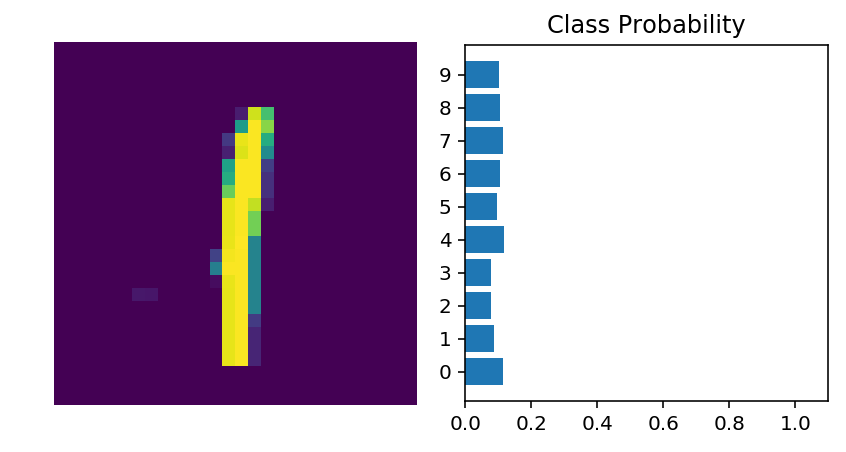

In [21]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [23]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0090,  0.0135, -0.0173,  ...,  0.0220, -0.0354,  0.0076],
        [ 0.0245, -0.0256,  0.0139,  ...,  0.0144, -0.0266,  0.0334],
        [ 0.0038, -0.0002,  0.0194,  ..., -0.0220,  0.0008,  0.0089],
        ...,
        [-0.0057,  0.0049,  0.0123,  ...,  0.0015,  0.0277, -0.0082],
        [ 0.0208,  0.0344,  0.0027,  ...,  0.0165, -0.0037, -0.0174],
        [-0.0085, -0.0211, -0.0182,  ..., -0.0194, -0.0331, -0.0103]],
       requires_grad=True)

In [24]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [25]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
